# **Pandas: Manipulación de datos**

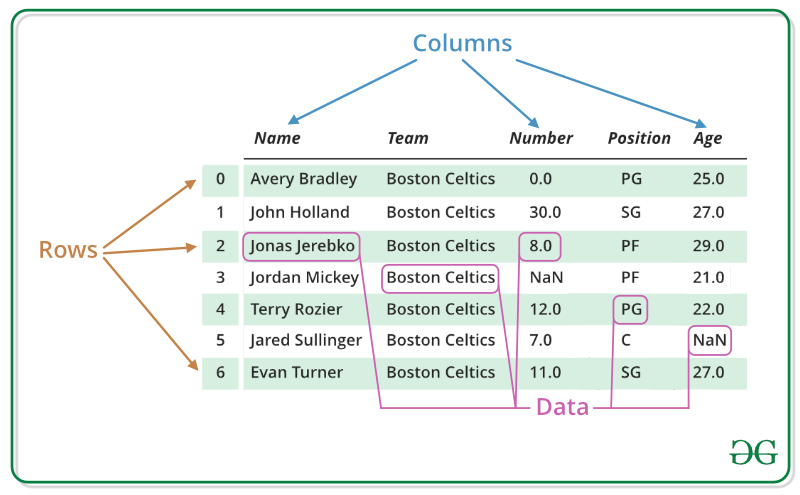

In [48]:
# importar librerías
import pandas as pd
import numpy as np

In [49]:
data = {
    "Nombre": ["Ana", "Luis", "Carlos", "Ana", "Marta", "Luis"],
    "Edad": [23, 35, 40, 23, 29, 35],
    "Ciudad": ["Lima", "Bogotá", "Lima", "Lima", "Quito", "Bogotá"],
    "Ventas": [200, 500, 300, 150, 400, 500]
}

In [50]:
data

{'Nombre': ['Ana', 'Luis', 'Carlos', 'Ana', 'Marta', 'Luis'],
 'Edad': [23, 35, 40, 23, 29, 35],
 'Ciudad': ['Lima', 'Bogotá', 'Lima', 'Lima', 'Quito', 'Bogotá'],
 'Ventas': [200, 500, 300, 150, 400, 500]}

In [51]:
# De diccionario a dataframe
df = pd.DataFrame(data)

In [52]:
# Mostrar las 5 primeras filas
df.head()

,Nombre,Edad,Ciudad,Ventas
0,Ana,23,Lima,200
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
3,Ana,23,Lima,150
4,Marta,29,Quito,400


### **Métodos básicos de exploración**

In [53]:
# ultimas filas
df.tail()

,Nombre,Edad,Ciudad,Ventas
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
3,Ana,23,Lima,150
4,Marta,29,Quito,400
5,Luis,35,Bogotá,500


In [54]:
df.shape # (filas, columnas)

(6, 4)

In [55]:
df.info() # informacion general

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  6 non-null      object
 1   Edad    6 non-null      int64 
 2   Ciudad  6 non-null      object
 3   Ventas  6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


In [56]:
df.describe() # estadística básica del df

,Edad,Ventas
count,6.000000,6.000000
mean,30.833333,341.666667
std,6.997619,149.721965
min,23.000000,150.000000
25%,24.500000,225.000000
50%,32.000000,350.000000
75%,35.000000,475.000000
max,40.000000,500.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  6 non-null      object
 1   Edad    6 non-null      int64 
 2   Ciudad  6 non-null      object
 3   Ventas  6 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


### **Selección de datos**

In [58]:
# selección de una columna
df['Edad']

0    23
1    35
2    40
3    23
4    29
5    35
Name: Edad, dtype: int64

In [59]:
# selección para más de una columna
df[['Nombre', 'Edad']]

,Nombre,Edad
0,Ana,23
1,Luis,35
2,Carlos,40
3,Ana,23
4,Marta,29
5,Luis,35


In [60]:
df

,Nombre,Edad,Ciudad,Ventas
0,Ana,23,Lima,200
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
3,Ana,23,Lima,150
4,Marta,29,Quito,400
5,Luis,35,Bogotá,500


In [61]:
# Selección de una fila
df.loc[0] # este es más usado cuando tiene etiquetas

Nombre     Ana
Edad        23
Ciudad    Lima
Ventas     200
Name: 0, dtype: object

In [62]:
df.iloc[0]

Nombre     Ana
Edad        23
Ciudad    Lima
Ventas     200
Name: 0, dtype: object

In [63]:
# Selección multiple
# df.iloc[filas, columnas]
df.iloc[:4,:]

,Nombre,Edad,Ciudad,Ventas
0,Ana,23,Lima,200
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
3,Ana,23,Lima,150


In [64]:
df.iloc[:4,:2]

,Nombre,Edad
0,Ana,23
1,Luis,35
2,Carlos,40
3,Ana,23


In [65]:
df.iloc[:4,-2:]

,Ciudad,Ventas
0,Lima,200
1,Bogotá,500
2,Lima,300
3,Lima,150


In [66]:
df.loc[:4,'Ciudad':'Ventas']

,Ciudad,Ventas
0,Lima,200
1,Bogotá,500
2,Lima,300
3,Lima,150
4,Quito,400


In [67]:
# Filtro condicional
mascara = df['Ventas'] > 250
mascara

0    False
1     True
2     True
3    False
4     True
5     True
Name: Ventas, dtype: bool

In [68]:
df

,Nombre,Edad,Ciudad,Ventas
0,Ana,23,Lima,200
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
3,Ana,23,Lima,150
4,Marta,29,Quito,400
5,Luis,35,Bogotá,500


In [69]:
df[mascara]

,Nombre,Edad,Ciudad,Ventas
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
4,Marta,29,Quito,400
5,Luis,35,Bogotá,500


In [70]:
mascara1 = df['Edad'] == 35
df[mascara1]

,Nombre,Edad,Ciudad,Ventas
1,Luis,35,Bogotá,500
5,Luis,35,Bogotá,500


In [71]:
# Para varias condiciones
condicion1 = df['Ciudad'] == 'Lima'
condicion2 = df['Edad'] > 30
df[condicion1 & condicion2] # and

,Nombre,Edad,Ciudad,Ventas
2,Carlos,40,Lima,300


In [72]:
df[condicion1 | condicion2] # or

,Nombre,Edad,Ciudad,Ventas
0,Ana,23,Lima,200
1,Luis,35,Bogotá,500
2,Carlos,40,Lima,300
3,Ana,23,Lima,150
5,Luis,35,Bogotá,500


### **Operaciones con columnas**

In [73]:
# Crear una nueva columna
df['Ventas_IGV'] = df['Ventas'] * 1.18

In [74]:
# Eliminar una columna
df.drop('Ventas_IGV', axis=1, inplace=True) # 1: columnas, 0: filas

In [75]:
# Renombrar las columnas
df.rename(columns={'Nombre':'Cliente'}, inplace=True)

In [76]:
# Aplicar funciones
def clasificar_pais(ciudad):
    if ciudad == 'Lima':
        return 'Perú'
    elif ciudad =='Bogotá':
        return 'Colombia'
    elif ciudad == 'Quito':
        return 'Ecuador'
    else:
        return 'Sin Pais'

In [77]:
df['Pais'] = df['Ciudad'].apply(clasificar_pais)

In [78]:
df

,Cliente,Edad,Ciudad,Ventas,Pais
0,Ana,23,Lima,200,Perú
1,Luis,35,Bogotá,500,Colombia
2,Carlos,40,Lima,300,Perú
3,Ana,23,Lima,150,Perú
4,Marta,29,Quito,400,Ecuador
5,Luis,35,Bogotá,500,Colombia


In [79]:
df['Ciudad'].unique() # valores unicos

array(['Lima', 'Bogotá', 'Quito'], dtype=object)

In [80]:
df['Ciudad'].nunique() # cuantos valores unicos

3

In [81]:
df['Ciudad'].value_counts() # cuantas veces se repite cada valor unico

Ciudad
Lima      3
Bogotá    2
Quito     1
Name: count, dtype: int64

In [82]:
# Eliminar duplicados
df.drop_duplicates()

,Cliente,Edad,Ciudad,Ventas,Pais
0,Ana,23,Lima,200,Perú
1,Luis,35,Bogotá,500,Colombia
2,Carlos,40,Lima,300,Perú
3,Ana,23,Lima,150,Perú
4,Marta,29,Quito,400,Ecuador


In [83]:
df.drop_duplicates(subset=['Cliente', 'Ciudad', 'Edad'], keep='first')

,Cliente,Edad,Ciudad,Ventas,Pais
0,Ana,23,Lima,200,Perú
1,Luis,35,Bogotá,500,Colombia
2,Carlos,40,Lima,300,Perú
4,Marta,29,Quito,400,Ecuador


In [84]:
df.drop_duplicates(inplace=True)

In [85]:
df

,Cliente,Edad,Ciudad,Ventas,Pais
0,Ana,23,Lima,200,Perú
1,Luis,35,Bogotá,500,Colombia
2,Carlos,40,Lima,300,Perú
3,Ana,23,Lima,150,Perú
4,Marta,29,Quito,400,Ecuador


In [86]:
df['Ventas'].sum() # suma de la columna 'Ventas'

np.int64(1550)

In [87]:
df['Ventas'].mean() # Promedio

np.float64(310.0)

Ordenamiento de valores

In [100]:
df.sort_values(by='Edad', ascending=False)

,Cliente,Edad,Ciudad,Ventas,Pais
2,Carlos,40,Lima,300,Perú
1,Luis,35,Bogotá,500,Colombia
4,Marta,29,Quito,400,Ecuador
0,Ana,23,Lima,200,Perú
3,Ana,23,Lima,150,Perú


In [101]:
df.sort_values(by='Ventas', ascending=False)

,Cliente,Edad,Ciudad,Ventas,Pais
1,Luis,35,Bogotá,500,Colombia
4,Marta,29,Quito,400,Ecuador
2,Carlos,40,Lima,300,Perú
0,Ana,23,Lima,200,Perú
3,Ana,23,Lima,150,Perú


Agrupamiento por columna

In [102]:
df.groupby('Ciudad')['Ventas'].mean()

Ciudad
Bogotá    500.000000
Lima      216.666667
Quito     400.000000
Name: Ventas, dtype: float64

In [103]:
df.groupby('Cliente')['Ventas'].sum()

Cliente
Ana       350
Carlos    300
Luis      500
Marta     400
Name: Ventas, dtype: int64

Agregración multiple

In [105]:
df.groupby('Ciudad').agg({
        'Edad':['mean', 'max'],
        'Ventas':['sum', 'mean']
})

Edad     Ventas            
             mean max    sum        mean
Ciudad                                  
Bogotá  35.000000  35    500  500.000000
Lima    28.666667  40    650  216.666667
Quito   29.000000  29    400  400.000000